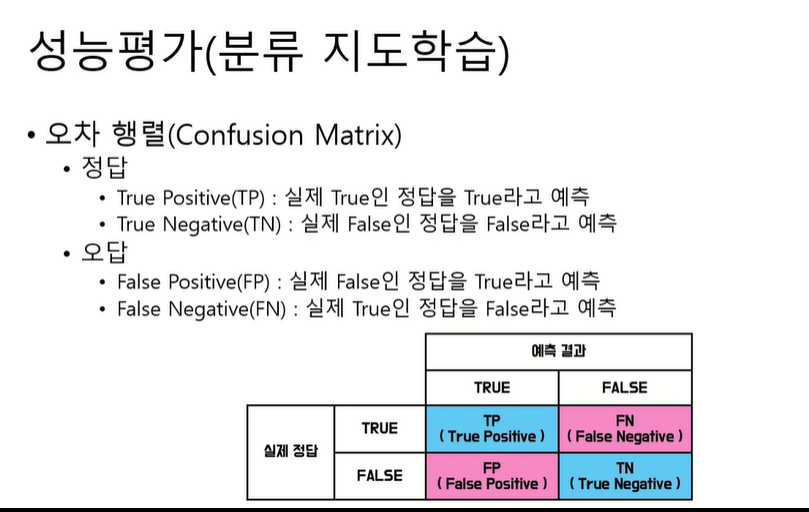

 - 정확도는 tp+tn / (tp + fn +fp +tn)
 - 정밀도(Precision) = tp / tp+fp , 모델관점
 - 재현율(Recall) = tp / tp+fn , 정답 관점
 
 - 정밀도가 올라가면 재현율이 떨어질 수 있고 반대의 경우도 있는 trade off
 - 둘다 높은 것이 좋기는 함

- 오차행렬
- f1 = 2 * 1/(1/정밀도 + 1/재현율) = 2 * (정밀도 * 재현율 / (정밀도 + 재현율))

In [1]:
#패키지 불러오기
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
import graphviz
from sklearn.tree import export_graphviz


In [2]:
df = pd.read_csv('data/student.csv', encoding='utf-8-sig')
df.head()

,gre,gpa,rank,sex,age,nationality,admit
0,380.0,3.61,3,f,19,Korea,불합격
1,660.0,3.67,3,f,18,Korea,NaN
2,800.0,4.00,1,m,19,Korea,합격
3,NaN,3.19,4,m,19,Korea,합격
4,520.0,2.93,4,f,19,Korea,불합격


In [3]:
df = df.drop(['nationality'], axis = 1)

In [4]:
df['sex'] = df.sex.map({'f':0,'m':1})
df['admit'] = df.admit.map({'불합격':0,'합격':1})

In [5]:
df.gre.fillna(df.gre.median(), inplace=True)
df.gpa.fillna(df.gpa.median(), inplace = True)

In [6]:
df = df.dropna(axis = 0)

In [7]:
X = np.array(df.iloc[:,:-1])
y = np.array(df['admit'])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [9]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [10]:
temp_y_pred = tree.predict(X_test)
temp_acc = accuracy_score(y_test, temp_y_pred)

print('정확도',format(temp_acc))

정확도 0.6916666666666667


In [11]:
t_scores, test_scores = list(),list()
for i in range(1,20):
    DT = DecisionTreeClassifier(max_depth=i)
    DT.fit(X_train, y_train)
   
    train_att = DT.predict(X_train)
    train_acc = accuracy_score(y_train, train_att)
    t_scores.append(train_acc)
    
    test_att = DT.predict(X_test)
    test_acc = accuracy_score(y_test, test_att)
    test_scores.append(test_acc)
    
    print('>%d, train: %.3f, test: %.3f' %(i,train_acc, test_acc))

>1, train: 0.665, test: 0.725
>2, train: 0.705, test: 0.767
>3, train: 0.741, test: 0.683
>4, train: 0.766, test: 0.717
>5, train: 0.781, test: 0.733
>6, train: 0.802, test: 0.733
>7, train: 0.849, test: 0.742
>8, train: 0.878, test: 0.733
>9, train: 0.924, test: 0.733
>10, train: 0.946, test: 0.767
>11, train: 0.971, test: 0.733
>12, train: 0.975, test: 0.708
>13, train: 0.982, test: 0.700
>14, train: 0.989, test: 0.683
>15, train: 0.993, test: 0.667
>16, train: 0.993, test: 0.683
>17, train: 0.993, test: 0.667
>18, train: 0.993, test: 0.692
>19, train: 0.993, test: 0.683


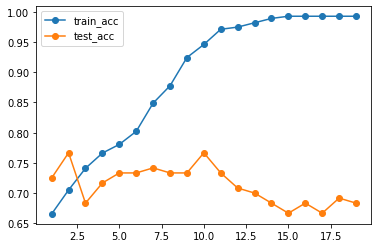

In [12]:
pyplot.plot(range(1,20), t_scores, '-o', label = 'train_acc')
pyplot.plot(range(1,20), test_scores, '-o', label = 'test_acc')
pyplot.legend()
pyplot.show()


In [13]:
tree = DecisionTreeClassifier(random_state=0, max_depth=2)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [14]:
temp_y_pred = tree.predict(X_test)
temp_acc = accuracy_score(y_test, temp_y_pred)

print('정확도',format(temp_acc))

정확도 0.7666666666666667


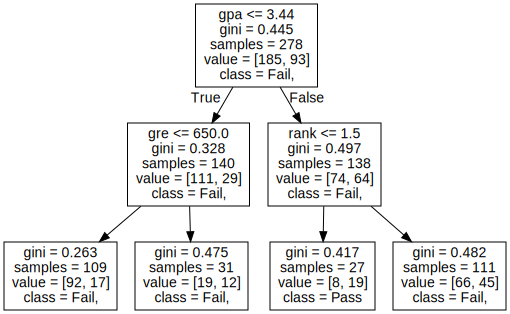

In [15]:
feature_neme = ['gre','gpa','rank','sex','age']
tree.graph = export_graphviz(tree, feature_names=feature_neme,
                       class_names=['Fail,','Pass'])
graphviz.Source(tree.graph)

# 8주차 과제 2
- 60171100 윤민혁
- 합격여부 모델 ROC,AUC

In [16]:
tree.predict(X_test)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [17]:
tree.predict_proba(X_test)[:,1]

array([0.1559633 , 0.1559633 , 0.1559633 , 0.38709677, 0.1559633 ,
       0.1559633 , 0.1559633 , 0.40540541, 0.38709677, 0.1559633 ,
       0.1559633 , 0.40540541, 0.1559633 , 0.1559633 , 0.40540541,
       0.1559633 , 0.40540541, 0.40540541, 0.40540541, 0.1559633 ,
       0.1559633 , 0.40540541, 0.1559633 , 0.1559633 , 0.1559633 ,
       0.1559633 , 0.1559633 , 0.40540541, 0.1559633 , 0.1559633 ,
       0.1559633 , 0.1559633 , 0.1559633 , 0.1559633 , 0.1559633 ,
       0.38709677, 0.1559633 , 0.38709677, 0.1559633 , 0.40540541,
       0.1559633 , 0.7037037 , 0.40540541, 0.1559633 , 0.1559633 ,
       0.40540541, 0.38709677, 0.40540541, 0.40540541, 0.1559633 ,
       0.40540541, 0.1559633 , 0.40540541, 0.38709677, 0.1559633 ,
       0.38709677, 0.1559633 , 0.40540541, 0.40540541, 0.38709677,
       0.7037037 , 0.1559633 , 0.40540541, 0.40540541, 0.1559633 ,
       0.40540541, 0.1559633 , 0.1559633 , 0.40540541, 0.1559633 ,
       0.1559633 , 0.40540541, 0.1559633 , 0.1559633 , 0.15596

In [18]:
print(confusion_matrix(y_test, temp_y_pred))

[[87  0]
 [28  5]]


In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('accuracy :', accuracy_score(y_test, tree.predict(X_test)))
print('precision:', precision_score(y_test, tree.predict(X_test)))
print('recall:', recall_score(y_test, tree.predict(X_test)))
print('f1:', f1_score(y_test, tree.predict(X_test)))

accuracy : 0.7666666666666667
precision: 1.0
recall: 0.15151515151515152
f1: 0.2631578947368421


In [20]:
from sklearn.metrics import roc_curve
fpr,tpr, thresholds = roc_curve(y_test, tree.predict_proba(X_test)[:,1])

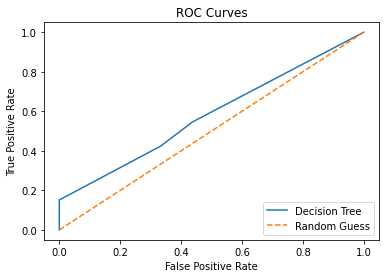

In [21]:
plt.plot(fpr,tpr,'-',ms = 2, label = 'Decision Tree')
plt.plot([0,1],[0,1],'--', label = 'Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc = 'lower right')
plt.show()

In [22]:
from sklearn import metrics
roc_auc = metrics.auc(fpr, tpr)
print('Area Under Curve: %0.2f' %roc_auc)

Area Under Curve: 0.58


# 8주차 개인톡 과제
- 경영정보학과 60171100 윤민혁

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
RF = RandomForestClassifier(n_estimators=300, random_state=0)

In [25]:
RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=0)

In [26]:
temp_y_pred_rf = RF.predict(X_test)
temp_y_pred_rf

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0.])

In [27]:
temp_acc_rf = accuracy_score(y_test, RF.predict(X_test))
print(format(temp_acc_rf))

0.7416666666666667


In [28]:
# 의사결정나무 모델
print('accuracy :', accuracy_score(y_test, tree.predict(X_test)))
print('precision:', precision_score(y_test, tree.predict(X_test)))
print('recall:', recall_score(y_test, tree.predict(X_test)))
print('f1:', f1_score(y_test, tree.predict(X_test)))

accuracy : 0.7666666666666667
precision: 1.0
recall: 0.15151515151515152
f1: 0.2631578947368421


In [29]:
# 랜덤포레스트 모델
print('accuracy :', accuracy_score(y_test, temp_y_pred_rf))
print('precision:', precision_score(y_test, temp_y_pred_rf))
print('recall:', recall_score(y_test, temp_y_pred_rf))
print('f1:', f1_score(y_test, temp_y_pred_rf))

accuracy : 0.7416666666666667
precision: 0.5454545454545454
recall: 0.36363636363636365
f1: 0.43636363636363634


In [31]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, tree.predict_proba(X_test)[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, RF.predict_proba(X_test)[:,1])
roc_auc_DT = metrics.auc(fpr1,tpr1)
roc_auc_RF = metrics.auc(fpr2, tpr2)

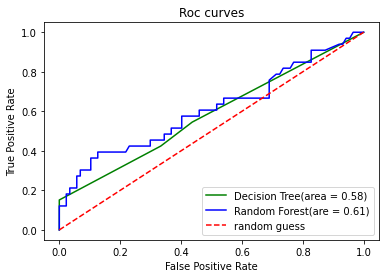

In [32]:
plt.plot(fpr1, tpr1,'g-',label = 'Decision Tree(area = %0.2f)'%roc_auc_DT)
plt.plot(fpr2, tpr2 ,'b-', label = 'Random Forest(are = %0.2f)' %roc_auc_RF)
plt.plot([0,1],[0,1], 'r--', label= 'random guess')


plt.title('Roc curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

- 의사결정나무 모델에 비해 랜덤포레스트(n_estimators을 300으로 설정했을 경우)는 정확도와 정밀도는 낮지만 재현율과 f1-score는 높은 것으로 나타났습니다. auc는 랜덤포레스트를 사용했을 경우에 0.03정도 더 높은 것을 확인 할 수 있었습니다.
- 위의 경우에는 재현율과 f1-score를 고려하여 모델의 성능을 평가하는 것이 더 좋다고 생각합